# 5 - Candele Giapponesi e Volumi

## Caricamento librerie/moduli

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import metcomputlib as mc
import myownlib as my

In [2]:
mc.Ver()

------------------------------------------------------------------------------------------
Saturday, March 15, 2025, 23:07:29
Platform : macOS-15.3.2-arm64-arm-64bit
------------------------------------------------------------------------------------------
Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
JupyterLab 4.3.4
------------------------------------------------------------------------------------------
Matplotlib 3.9.2
Pandas 2.2.2
NumPy 1.26.4
SciPy 1.13.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [3]:
# load AAPL.csv in a DataFrame
Aapl = mc.ReadStockPrices('AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-01-23')
day3 = np.datetime64('2000-02-15')

In [4]:
# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Determinazione righe del periodo per candele e volumi

In [5]:
rows = my.FindRows(D, day1, day3)
r1 = rows[0]
r2 = rows[-1]

## Plottaggio Grafico senza uso di funzioni

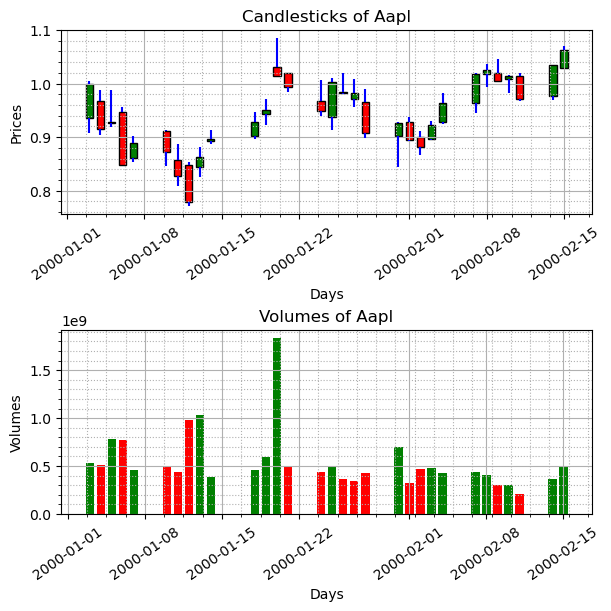

In [6]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
for i in range(r1, r2+1):
    if C[i] < O[i]:
        opt = 'r'
    else:
        opt = 'g'
    mc.ChartItem(D[i], O[i], H[i], L[i], C[i], 'candle', opt)
mc.EndChart(Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
for i in range(r1, r2+1):
    if i == 0:
        opt = 'b'
    elif C[i] < C[i-1]:
        opt = 'r'
    elif C[i] > C[i-1]:
        opt = 'g'
    else:
        opt = 'b'
    plt.bar(D[i], V[i], color=opt)
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()

## Determinazione delle funzioni

In [7]:
def PlotVolumes(D, C, V, d1, d2):
    rows = my.FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    for i in range(r1, r2+1):
        if i == 0:
            opt = 'b'
        elif C[i] < C[i-1]:
            opt = 'r'
        elif C[i] > C[i-1]:
            opt = 'g'
        else:
            opt = 'b'
        plt.bar(D[i], V[i], color=opt)


def PlotCandles(D, O, H, L, C, d1, d2):
    rows = my.FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    for i in range(r1, r2+1):
        if C[i] < O[i]:
            opt = 'r'
        else:
            opt = 'g'
        mc.ChartItem(D[i], O[i], H[i], L[i], C[i], 'candle', opt)

## Grafico con uso di funzioni

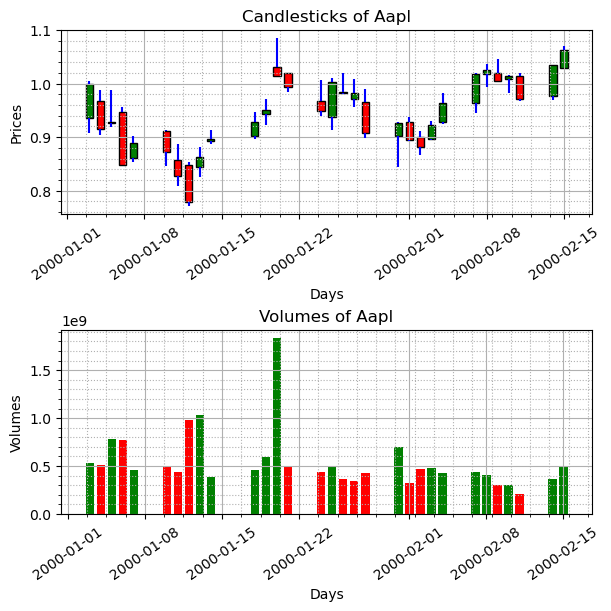

In [8]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
PlotCandles(D, O, H, L, C, day1, day3)
mc.EndChart(Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
PlotVolumes(D, C, V, day1, day3)
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()